In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [2]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5359.5/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="peAtdpeJN9JbTS3jM8EV")
project = rf.workspace("pidray-8gl3p").project("pidray-bbmo7")
dataset = project.version(1).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.0, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PIDRAY-1 in yolov8:: 100%|██████████| 20132/20132 [00:02<00:00, 8185.15it/s] 


# **LOAD THE MODEL**

In [4]:
yolo8_model_detection =YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 115MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [9]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/PIDRAY-1 datasets/sixray100-1

# **TRAIN MODEL**

In [10]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=150, imgsz=640, batch=16,project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=150, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 19.1MB/s]
2024-01-11 08:52:51,365	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-11 08:52:52,031	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-1/train/labels... 7820 images, 2 backgrounds, 0 corrupt: 100%|██████████| 7820/7820 [00:06<00:00, 1278.51it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-1/valid/labels... 1537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:01<00:00, 1253.83it/s]


val: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-1/valid/labels.cache
Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.31G      1.462      3.869      1.522         36        640: 100%|██████████| 489/489 [01:32<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:12<00:00,  4.03it/s]


                   all       1537       1694      0.604      0.215      0.175       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.31G      1.393      2.795       1.43         23        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.04it/s]


                   all       1537       1694       0.56      0.256      0.211      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.31G      1.437      2.497      1.459         44        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  5.95it/s]


                   all       1537       1694      0.714      0.245      0.279      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.31G      1.493      2.281      1.509         35        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.23it/s]


                   all       1537       1694      0.453      0.343      0.338      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       2.3G      1.418      1.973      1.465         23        640: 100%|██████████| 489/489 [01:27<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.16it/s]


                   all       1537       1694      0.527      0.322      0.326      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.29G      1.347      1.763      1.412         37        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.25it/s]


                   all       1537       1694      0.498      0.401      0.391      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150       2.3G      1.298      1.633      1.378         34        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.26it/s]


                   all       1537       1694      0.517      0.363      0.353      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150       2.3G      1.257      1.562      1.351         29        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.20it/s]


                   all       1537       1694      0.656      0.433      0.464      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150       2.3G      1.224      1.487      1.333         42        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.27it/s]


                   all       1537       1694      0.704      0.474      0.515      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       2.3G      1.205      1.437      1.324         35        640: 100%|██████████| 489/489 [01:28<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.30it/s]


                   all       1537       1694       0.66      0.462       0.53      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.29G      1.173      1.375      1.299         26        640: 100%|██████████| 489/489 [01:28<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.39it/s]


                   all       1537       1694      0.644       0.41      0.472      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.29G      1.156      1.341      1.285         49        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.25it/s]


                   all       1537       1694      0.643      0.443      0.533      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150       2.3G      1.146      1.299      1.275         33        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.21it/s]

                   all       1537       1694      0.613      0.522      0.558      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150       2.3G      1.118      1.261      1.261         27        640: 100%|██████████| 489/489 [01:26<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.31it/s]


                   all       1537       1694      0.718      0.529      0.528      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       2.3G      1.107       1.24      1.258         36        640: 100%|██████████| 489/489 [01:27<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.24it/s]


                   all       1537       1694      0.629      0.486      0.538      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150       2.3G      1.099      1.216      1.253         50        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.34it/s]


                   all       1537       1694      0.739      0.516      0.535      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.29G      1.078      1.174      1.239         22        640: 100%|██████████| 489/489 [01:28<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.14it/s]


                   all       1537       1694      0.771      0.481      0.592      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150       2.3G      1.073      1.156       1.23         45        640: 100%|██████████| 489/489 [01:28<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.23it/s]


                   all       1537       1694      0.803       0.42      0.524      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.29G      1.058      1.142      1.225         27        640: 100%|██████████| 489/489 [01:28<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.36it/s]

                   all       1537       1694      0.762      0.508      0.572       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.29G      1.042      1.124      1.219         39        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.04it/s]


                   all       1537       1694      0.793      0.548      0.587      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.31G      1.034      1.092      1.206         32        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.08it/s]


                   all       1537       1694      0.827      0.501      0.583      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.29G      1.028      1.079      1.203         22        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.15it/s]


                   all       1537       1694      0.818      0.517      0.611      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.29G       1.01      1.051       1.19         26        640: 100%|██████████| 489/489 [01:28<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.09it/s]


                   all       1537       1694      0.798      0.525      0.584      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150       2.3G      1.003       1.05      1.192         47        640: 100%|██████████| 489/489 [01:29<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.26it/s]


                   all       1537       1694      0.764      0.537      0.589      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150       2.3G     0.9936      1.025      1.184         24        640: 100%|██████████| 489/489 [01:28<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.37it/s]


                   all       1537       1694      0.774      0.619      0.648      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       2.3G     0.9998      1.017      1.185         34        640: 100%|██████████| 489/489 [01:29<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.34it/s]


                   all       1537       1694      0.814      0.556      0.627      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.29G     0.9808     0.9977      1.175         37        640: 100%|██████████| 489/489 [01:28<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.21it/s]


                   all       1537       1694      0.764      0.516      0.593      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.29G     0.9796      0.993      1.173         33        640: 100%|██████████| 489/489 [01:29<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.34it/s]


                   all       1537       1694      0.753      0.554      0.602      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.29G     0.9708     0.9831      1.168         30        640: 100%|██████████| 489/489 [01:29<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.33it/s]


                   all       1537       1694      0.876      0.552      0.654      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150       2.3G     0.9721     0.9757      1.167         37        640: 100%|██████████| 489/489 [01:28<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.28it/s]

                   all       1537       1694      0.784      0.606      0.646      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.29G      0.965     0.9697      1.165         25        640: 100%|██████████| 489/489 [01:29<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.37it/s]


                   all       1537       1694      0.815      0.576      0.658      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.29G     0.9605     0.9524      1.158         29        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.32it/s]


                   all       1537       1694      0.851      0.604      0.659      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.29G     0.9426     0.9342      1.149         25        640: 100%|██████████| 489/489 [01:28<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.27it/s]

                   all       1537       1694      0.798      0.591      0.636      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       2.3G     0.9414     0.9299      1.149         48        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.32it/s]


                   all       1537       1694      0.845      0.632      0.697       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.29G     0.9483     0.9344      1.151         20        640: 100%|██████████| 489/489 [01:29<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.05it/s]


                   all       1537       1694      0.837      0.613      0.651       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.29G      0.932     0.9073      1.139         25        640: 100%|██████████| 489/489 [01:28<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.11it/s]

                   all       1537       1694      0.877      0.546      0.642       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150       2.3G       0.94     0.9091      1.146         30        640: 100%|██████████| 489/489 [01:28<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.11it/s]

                   all       1537       1694      0.871      0.591       0.65      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.29G     0.9218      0.892      1.134         37        640: 100%|██████████| 489/489 [01:30<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.25it/s]

                   all       1537       1694      0.863      0.588      0.677      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.29G     0.9229     0.8914      1.138         31        640: 100%|██████████| 489/489 [01:28<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.35it/s]


                   all       1537       1694      0.832       0.58      0.673      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.29G     0.9237      0.885      1.135         40        640: 100%|██████████| 489/489 [01:29<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.40it/s]

                   all       1537       1694      0.864      0.583      0.671      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.29G     0.9202     0.8928      1.133         25        640: 100%|██████████| 489/489 [01:28<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.48it/s]

                   all       1537       1694      0.861      0.588      0.663      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.29G     0.9151     0.8796       1.13         24        640: 100%|██████████| 489/489 [01:27<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.36it/s]

                   all       1537       1694      0.887      0.618      0.691      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.29G      0.911     0.8667      1.129         32        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.38it/s]


                   all       1537       1694      0.817      0.653      0.695      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150       2.3G     0.8995     0.8548      1.117         32        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.39it/s]


                   all       1537       1694      0.884      0.604      0.699       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.29G     0.8893     0.8416      1.113         46        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.29it/s]

                   all       1537       1694      0.846      0.625      0.667      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150       2.3G      0.895     0.8412      1.114         33        640: 100%|██████████| 489/489 [01:27<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.31it/s]

                   all       1537       1694      0.862      0.639        0.7      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.31G     0.8852     0.8382      1.113         37        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.33it/s]


                   all       1537       1694      0.861      0.641      0.698      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.29G     0.8814     0.8235      1.109         29        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.39it/s]


                   all       1537       1694      0.888       0.61      0.698      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.29G     0.8809     0.8203       1.11         29        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.33it/s]


                   all       1537       1694      0.816      0.643      0.721        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       2.3G     0.8793     0.8333       1.11         31        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.44it/s]


                   all       1537       1694      0.892      0.627      0.725       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.29G     0.8646      0.806      1.101         39        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.55it/s]


                   all       1537       1694      0.871      0.636      0.722        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.29G     0.8698     0.8112      1.106         28        640: 100%|██████████| 489/489 [01:26<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.30it/s]


                   all       1537       1694      0.705      0.676      0.694      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.29G     0.8673     0.8034        1.1         21        640: 100%|██████████| 489/489 [01:27<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]

                   all       1537       1694      0.828      0.632      0.704      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150       2.3G     0.8678     0.8134      1.102         35        640: 100%|██████████| 489/489 [01:26<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.43it/s]


                   all       1537       1694      0.853      0.649      0.732      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.29G     0.8624      0.802      1.099         42        640: 100%|██████████| 489/489 [01:26<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.48it/s]


                   all       1537       1694      0.893      0.617      0.715      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.29G      0.863     0.7941        1.1         25        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.33it/s]


                   all       1537       1694      0.858      0.683      0.728      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.29G       0.85     0.7839      1.092         32        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.38it/s]


                   all       1537       1694      0.831      0.653       0.72      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.29G     0.8463     0.7779      1.089         27        640: 100%|██████████| 489/489 [01:27<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.47it/s]


                   all       1537       1694      0.852      0.684      0.731      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.29G     0.8581      0.786      1.094         26        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.35it/s]


                   all       1537       1694      0.856      0.684      0.738      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.29G      0.853     0.7864      1.096         35        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.31it/s]

                   all       1537       1694      0.885      0.665      0.754       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150       2.3G     0.8478     0.7661      1.087         28        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.16it/s]


                   all       1537       1694       0.78      0.685      0.746      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       2.3G     0.8427     0.7668      1.087         33        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.23it/s]


                   all       1537       1694      0.881      0.678      0.753      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.29G     0.8389      0.759      1.082         29        640: 100%|██████████| 489/489 [01:27<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.23it/s]


                   all       1537       1694      0.857      0.651      0.742      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       2.3G     0.8416     0.7613      1.087         38        640: 100%|██████████| 489/489 [01:27<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.14it/s]

                   all       1537       1694      0.853      0.644      0.725      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.29G     0.8373     0.7605      1.086         33        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.22it/s]

                   all       1537       1694      0.865       0.64      0.732      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.29G     0.8282     0.7402      1.078         30        640: 100%|██████████| 489/489 [01:28<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.21it/s]


                   all       1537       1694      0.889      0.635      0.726      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.29G     0.8282     0.7499       1.08         38        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.48it/s]

                   all       1537       1694      0.797      0.668      0.722      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.29G     0.8234      0.739      1.077         32        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.44it/s]

                   all       1537       1694      0.793       0.66      0.712        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150       2.3G     0.8219     0.7397      1.078         32        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.41it/s]


                   all       1537       1694      0.812      0.635      0.711      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.29G     0.8139      0.737      1.074         43        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.51it/s]

                   all       1537       1694      0.898      0.639      0.716      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.31G     0.8181     0.7418      1.076         42        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.39it/s]


                   all       1537       1694       0.88       0.66      0.734      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.29G     0.8132     0.7223      1.071         45        640: 100%|██████████| 489/489 [01:27<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.46it/s]

                   all       1537       1694      0.802      0.705      0.742      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.29G     0.8055     0.7127      1.063         31        640: 100%|██████████| 489/489 [01:27<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.48it/s]


                   all       1537       1694      0.837      0.694      0.739       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.29G     0.8085     0.7139      1.066         28        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.46it/s]

                   all       1537       1694      0.808       0.71      0.744       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.29G     0.8073     0.7182      1.066         31        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.41it/s]

                   all       1537       1694      0.878        0.7      0.749      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.29G     0.7981     0.7095      1.054         48        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.48it/s]

                   all       1537       1694      0.884      0.692      0.746      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.29G     0.7991     0.7079      1.061         40        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.39it/s]


                   all       1537       1694      0.884      0.708      0.755      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.29G     0.8043     0.7129      1.063         33        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.37it/s]


                   all       1537       1694      0.874      0.711      0.749      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.29G     0.7922     0.6972      1.054         25        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]


                   all       1537       1694       0.81      0.723      0.745      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.29G     0.7867     0.6921      1.055         23        640: 100%|██████████| 489/489 [01:27<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]

                   all       1537       1694      0.873      0.696      0.745      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.29G     0.7854     0.6945      1.054         31        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.41it/s]


                   all       1537       1694      0.853      0.709      0.744      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.29G     0.7867     0.6883      1.054         30        640: 100%|██████████| 489/489 [01:27<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.45it/s]

                   all       1537       1694      0.916      0.665      0.747      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.29G     0.7785     0.6726       1.05         27        640: 100%|██████████| 489/489 [01:28<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.46it/s]

                   all       1537       1694      0.877       0.67      0.725      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150       2.3G     0.7853     0.6802      1.054         31        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.44it/s]

                   all       1537       1694       0.71      0.734      0.749      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150       2.3G     0.7833      0.687      1.055         27        640: 100%|██████████| 489/489 [01:27<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.46it/s]


                   all       1537       1694       0.88      0.673      0.739      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.29G     0.7731     0.6762      1.052         37        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.45it/s]


                   all       1537       1694      0.822      0.706      0.732      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.29G     0.7721     0.6733      1.045         38        640: 100%|██████████| 489/489 [01:27<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.45it/s]


                   all       1537       1694      0.803      0.701      0.736      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.29G     0.7661     0.6646      1.041         37        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.49it/s]

                   all       1537       1694      0.699      0.711      0.733      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.29G     0.7676     0.6649      1.047         28        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.43it/s]

                   all       1537       1694        0.9      0.656      0.745      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       2.3G     0.7627      0.659      1.043         36        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.53it/s]


                   all       1537       1694      0.752      0.725      0.745       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.29G     0.7657     0.6585       1.04         27        640: 100%|██████████| 489/489 [01:27<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.36it/s]


                   all       1537       1694      0.854      0.697      0.739      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.29G     0.7618     0.6561      1.037         35        640: 100%|██████████| 489/489 [01:26<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.33it/s]


                   all       1537       1694      0.821      0.706      0.736      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.29G     0.7647     0.6611       1.04         33        640: 100%|██████████| 489/489 [01:27<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.44it/s]

                   all       1537       1694      0.893      0.649      0.738      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.29G     0.7581     0.6542      1.039         36        640: 100%|██████████| 489/489 [01:27<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.47it/s]


                   all       1537       1694      0.916       0.64      0.738      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.29G     0.7528     0.6455      1.039         27        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.52it/s]

                   all       1537       1694       0.73      0.729      0.745       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.29G     0.7556     0.6507      1.035         28        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.52it/s]

                   all       1537       1694      0.823      0.716      0.743      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.29G     0.7469     0.6438      1.032         37        640: 100%|██████████| 489/489 [01:27<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]


                   all       1537       1694      0.831      0.715      0.742       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.29G     0.7448     0.6333      1.034         39        640: 100%|██████████| 489/489 [01:27<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.45it/s]

                   all       1537       1694      0.838      0.714      0.746      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.29G     0.7399     0.6306      1.024         43        640: 100%|██████████| 489/489 [01:30<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.20it/s]

                   all       1537       1694      0.861      0.705      0.745       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150       2.3G     0.7436     0.6346       1.03         28        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.28it/s]

                   all       1537       1694      0.875      0.711      0.742      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.29G     0.7355     0.6292      1.027         26        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.18it/s]


                   all       1537       1694      0.857      0.713      0.748       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150       2.3G     0.7381     0.6266      1.027         33        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.21it/s]


                   all       1537       1694      0.753      0.717      0.752      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150       2.3G     0.7304     0.6201      1.022         23        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.43it/s]

                   all       1537       1694      0.769      0.715      0.751      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.29G     0.7304     0.6179      1.023         24        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.36it/s]


                   all       1537       1694      0.773      0.714      0.759      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.29G     0.7321     0.6185      1.026         34        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.37it/s]


                   all       1537       1694      0.764       0.72      0.759      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.29G     0.7282     0.6182      1.023         26        640: 100%|██████████| 489/489 [01:27<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.45it/s]

                   all       1537       1694       0.76      0.721      0.759      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.29G     0.7212     0.6124      1.019         31        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.41it/s]


                   all       1537       1694      0.791      0.711      0.756      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.29G     0.7149     0.6014      1.017         35        640: 100%|██████████| 489/489 [01:28<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.40it/s]


                   all       1537       1694       0.88      0.709      0.756      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.29G     0.7231     0.6075      1.018         30        640: 100%|██████████| 489/489 [01:28<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.37it/s]


                   all       1537       1694      0.901      0.691      0.755      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.29G     0.7211     0.6049      1.017         39        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.40it/s]

                   all       1537       1694      0.894      0.699      0.757      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.29G     0.7102     0.5975      1.013         37        640: 100%|██████████| 489/489 [01:28<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.48it/s]


                   all       1537       1694        0.9      0.694      0.758      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.29G     0.7122     0.6021      1.011         44        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.35it/s]


                   all       1537       1694      0.895      0.688      0.756      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.29G     0.7078     0.5934      1.012         25        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.46it/s]

                   all       1537       1694        0.8       0.72       0.75       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.29G     0.7098     0.5921      1.012         32        640: 100%|██████████| 489/489 [01:28<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.45it/s]


                   all       1537       1694        0.9       0.68      0.749      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.29G     0.7036      0.582       1.01         40        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]


                   all       1537       1694      0.801      0.715      0.748      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150       2.3G     0.7053     0.5921      1.011         34        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.38it/s]

                   all       1537       1694      0.802      0.715      0.746      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.29G     0.7026     0.5885      1.011         41        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.48it/s]

                   all       1537       1694        0.8      0.718      0.747      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.29G        0.7     0.5811      1.009         38        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.49it/s]


                   all       1537       1694      0.798      0.718      0.748       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.29G     0.6947     0.5766      1.006         31        640: 100%|██████████| 489/489 [01:28<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.39it/s]

                   all       1537       1694      0.903      0.688       0.75      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.29G     0.6899     0.5748      1.004         29        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.49it/s]

                   all       1537       1694      0.803      0.716       0.75      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.29G     0.6945     0.5799       1.01         41        640: 100%|██████████| 489/489 [01:28<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.38it/s]


                   all       1537       1694      0.817      0.715      0.749      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.29G     0.6892     0.5711      1.006         26        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.31it/s]


                   all       1537       1694      0.809      0.718      0.748       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.29G     0.6904     0.5709      1.006         31        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.28it/s]

                   all       1537       1694      0.804      0.718      0.749      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.29G     0.6815     0.5636     0.9959         39        640: 100%|██████████| 489/489 [01:27<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.10it/s]

                   all       1537       1694      0.801      0.717      0.749      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.28G     0.6839     0.5607      1.003         27        640: 100%|██████████| 489/489 [01:28<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.28it/s]

                   all       1537       1694      0.796       0.72      0.751      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.29G     0.6795     0.5539     0.9993         34        640: 100%|██████████| 489/489 [01:28<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.24it/s]

                   all       1537       1694      0.801       0.72      0.751      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.29G     0.6743     0.5573     0.9965         27        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:08<00:00,  6.05it/s]

                   all       1537       1694      0.803       0.72      0.752      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.29G     0.6725     0.5477     0.9956         33        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.36it/s]

                   all       1537       1694      0.794      0.706      0.752      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.29G     0.6716     0.5529     0.9928         41        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.37it/s]


                   all       1537       1694        0.8      0.721      0.753      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.29G     0.6714     0.5533     0.9957         34        640: 100%|██████████| 489/489 [01:28<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.33it/s]


                   all       1537       1694      0.799      0.722      0.753      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.29G     0.6748     0.5522     0.9975         42        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.35it/s]

                   all       1537       1694      0.778      0.726      0.753      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.29G     0.6677     0.5444     0.9931         38        640: 100%|██████████| 489/489 [01:28<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.38it/s]


                   all       1537       1694      0.783       0.73      0.752      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.29G      0.657     0.5442     0.9902         35        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.35it/s]


                   all       1537       1694      0.788       0.73      0.752      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.29G     0.6591     0.5353     0.9863         39        640: 100%|██████████| 489/489 [01:28<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.44it/s]


                   all       1537       1694      0.783      0.727      0.753      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.29G     0.6611     0.5343     0.9904         27        640: 100%|██████████| 489/489 [01:28<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]


                   all       1537       1694      0.781      0.727      0.752      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.29G      0.654     0.5356     0.9867         30        640: 100%|██████████| 489/489 [01:27<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.43it/s]

                   all       1537       1694      0.782      0.727      0.752      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.29G     0.6531      0.529     0.9852         25        640: 100%|██████████| 489/489 [01:27<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]

                   all       1537       1694      0.878      0.707      0.752      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.29G     0.6534      0.527     0.9866         40        640: 100%|██████████| 489/489 [01:27<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.51it/s]

                   all       1537       1694      0.878      0.708      0.752      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.29G     0.6452     0.5202     0.9824         30        640: 100%|██████████| 489/489 [01:27<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.44it/s]


                   all       1537       1694      0.878      0.709      0.753      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.29G     0.6486     0.5274     0.9852         28        640: 100%|██████████| 489/489 [01:27<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]


                   all       1537       1694      0.876      0.711      0.753      0.647
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150       2.3G     0.5176     0.3635     0.8966         13        640: 100%|██████████| 489/489 [01:23<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]


                   all       1537       1694       0.87      0.712      0.753      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150       2.3G     0.5061     0.3578     0.8924         16        640: 100%|██████████| 489/489 [01:21<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.48it/s]

                   all       1537       1694      0.868      0.713      0.753      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150       2.3G     0.5039     0.3526     0.8891         18        640: 100%|██████████| 489/489 [01:21<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.22it/s]

                   all       1537       1694      0.868      0.713      0.754      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150       2.3G     0.5029      0.351     0.8879         17        640: 100%|██████████| 489/489 [01:21<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.32it/s]

                   all       1537       1694      0.867      0.713      0.754      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150       2.3G     0.4978     0.3476     0.8842         17        640: 100%|██████████| 489/489 [01:21<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.34it/s]


                   all       1537       1694      0.866      0.713      0.754      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       2.3G     0.4894     0.3419     0.8834         15        640: 100%|██████████| 489/489 [01:22<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.42it/s]

                   all       1537       1694      0.762      0.737      0.757      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150       2.3G     0.4888     0.3382     0.8815         17        640: 100%|██████████| 489/489 [01:21<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.33it/s]


                   all       1537       1694      0.756      0.741      0.758      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150       2.3G     0.4887     0.3409     0.8841         16        640: 100%|██████████| 489/489 [01:21<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.46it/s]

                   all       1537       1694      0.762      0.741      0.758       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150       2.3G     0.4882      0.341     0.8801         17        640: 100%|██████████| 489/489 [01:22<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.51it/s]


                   all       1537       1694      0.764      0.741      0.759       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150       2.3G     0.4803     0.3341     0.8787         23        640: 100%|██████████| 489/489 [01:21<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:07<00:00,  6.26it/s]


                   all       1537       1694      0.763      0.742      0.759       0.65

150 epochs completed in 4.016 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 6.2MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 6.2MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 49/49 [00:09<00:00,  5.07it/s]


                   all       1537       1694      0.765      0.742      0.759      0.651
                 Baton       1537          4       0.82       0.25      0.255      0.179
                Bullet       1537          9      0.529      0.255      0.214     0.0981
                   Gun       1537         17        0.2      0.706      0.628      0.572
                Hammer       1537        960      0.992      0.968      0.994      0.944
             HandCuffs       1537         13      0.829      0.846      0.917       0.76
                 Knife       1537         13      0.813      0.615       0.74      0.672
               Lighter       1537         16      0.577      0.625      0.589      0.488
                Pliers       1537        375      0.949      0.939      0.981      0.869
             Powerbank       1537         49      0.932      0.959      0.986      0.807
              Scissors       1537        171       0.91      0.892      0.956      0.777
               Spraye

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed6ae2bd600>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

# **VAIDATE MODEL**

In [11]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007988 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-1/valid/labels.cache... 1537 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:13<00:00,  7.33it/s]


                   all       1537       1694      0.759      0.738      0.755      0.648
                 Baton       1537          4       0.84       0.25      0.256      0.179
                Bullet       1537          9      0.431      0.176      0.191      0.093
                   Gun       1537         17      0.206      0.706      0.633      0.577
                Hammer       1537        960      0.993      0.966      0.994      0.944
             HandCuffs       1537         13      0.833      0.846      0.884       0.74
                 Knife       1537         13      0.808       0.65      0.737      0.665
               Lighter       1537         16      0.554      0.625      0.588      0.484
                Pliers       1537        375      0.949      0.936       0.98      0.869
             Powerbank       1537         49      0.935      0.959      0.986      0.807
              Scissors       1537        171      0.913      0.889      0.955      0.779
               Spraye

array([    0.17932,    0.093045,     0.57654,     0.94396,     0.73981,     0.66543,     0.48381,     0.86872,     0.80701,      0.7787,     0.73157,      0.9119])

# **TESTING MODEL**


image 1/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23727_png.rf.60d1c5be783f92da65107fcee8eef836.jpg: 608x640 1 Hammer, 87.5ms
image 2/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23887_png.rf.c6d13016a52a1944cd78d76612e8ce1d.jpg: 640x640 1 Hammer, 8.0ms
image 3/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23888_png.rf.e418610f9ea47c4fae3a5e5fae317f7b.jpg: 480x640 1 Hammer, 70.2ms
image 4/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23890_png.rf.b74b1ca97d05cdd365953dd881cc440e.jpg: 480x640 (no detections), 6.0ms
image 5/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23891_png.rf.6e420733a31c0db4c601f246f52d1b19.jpg: 416x640 1 Hammer, 69.6ms
image 6/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23892_png.rf.0b07c8f337874b55451f39d618f2d2c8.jpg: 512x640 1 Wrench, 71.5ms
image 7/703 /kaggle/working/datasets/sixray100-1/test/images/xray_23893_png.rf.cf68d8f69d036634178b9e2f3afd64c0.jpg: 480x640 1 Hammer, 6.8ms
i

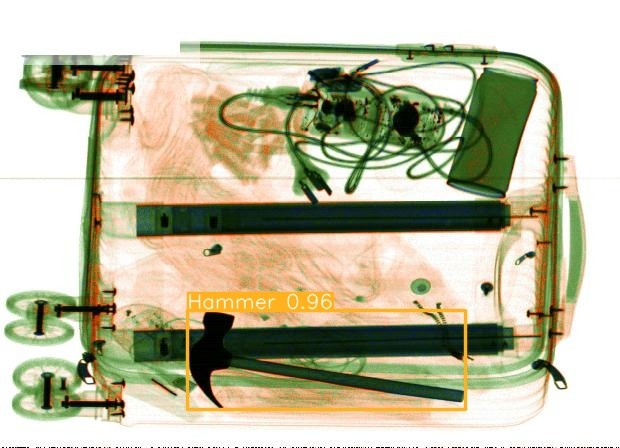

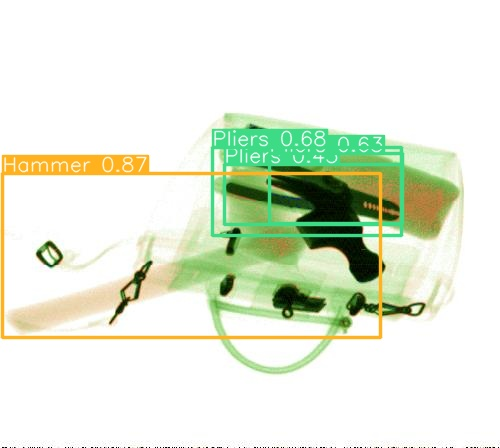

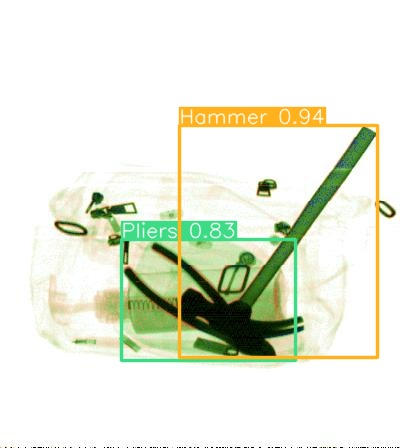

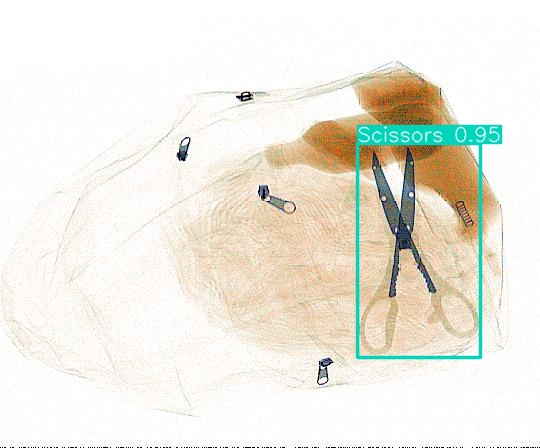

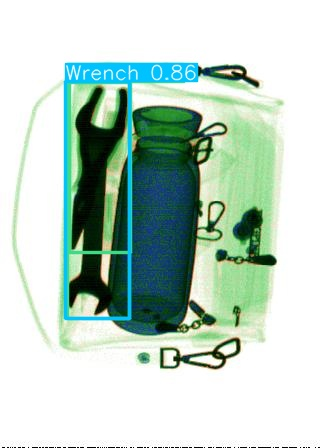

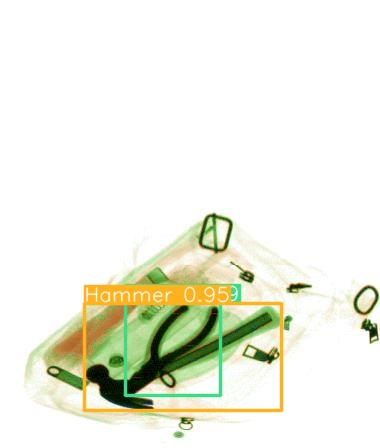

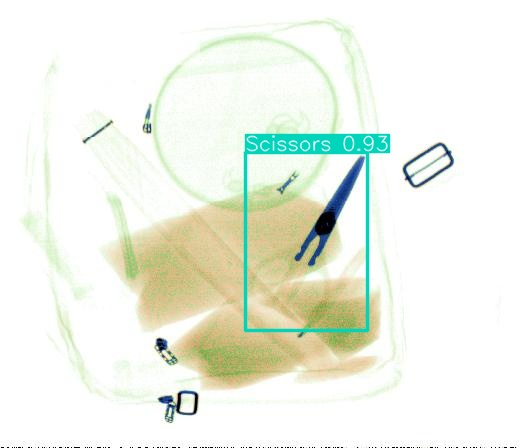

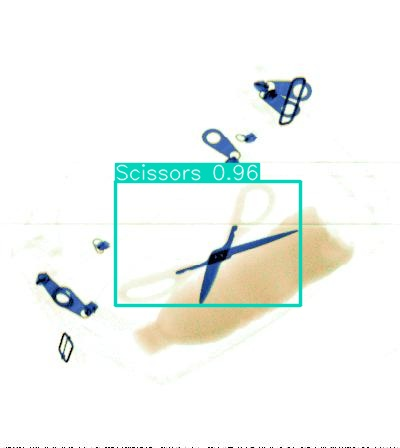

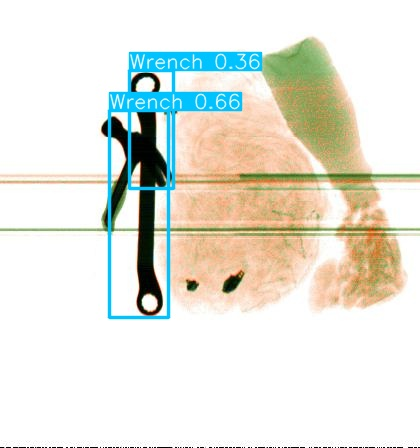

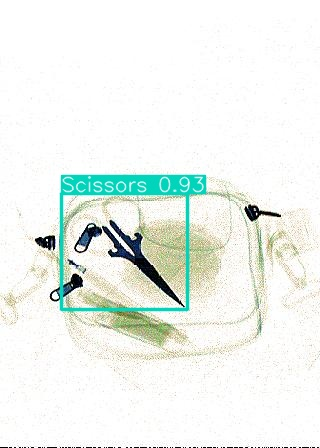

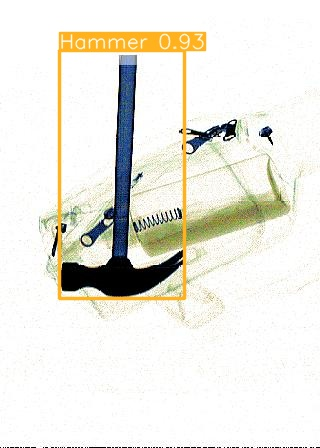

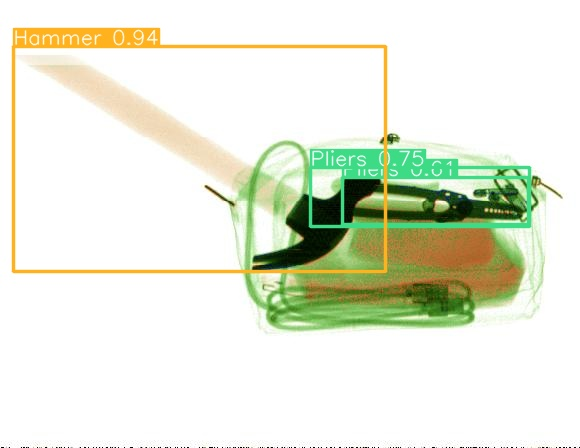

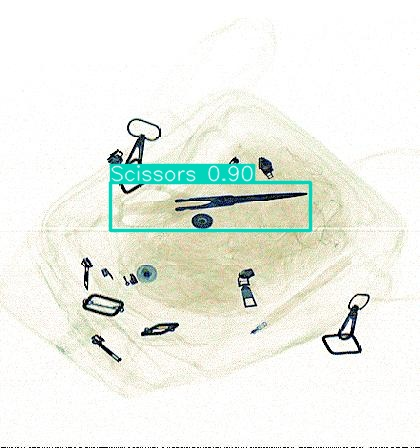

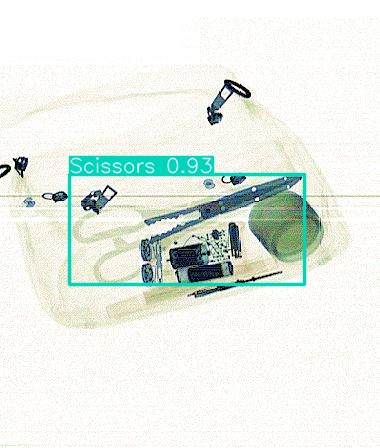

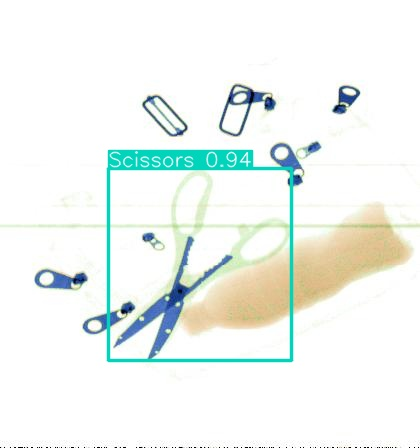

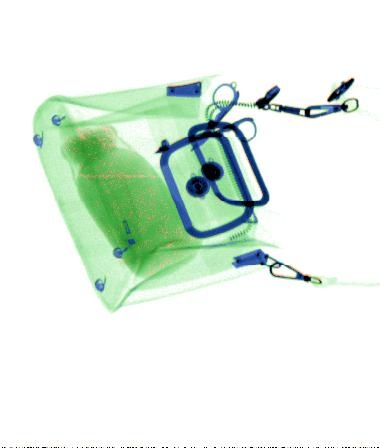

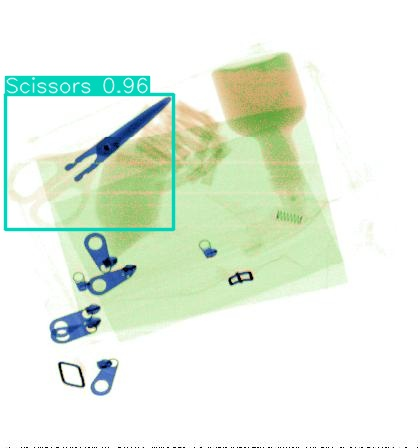

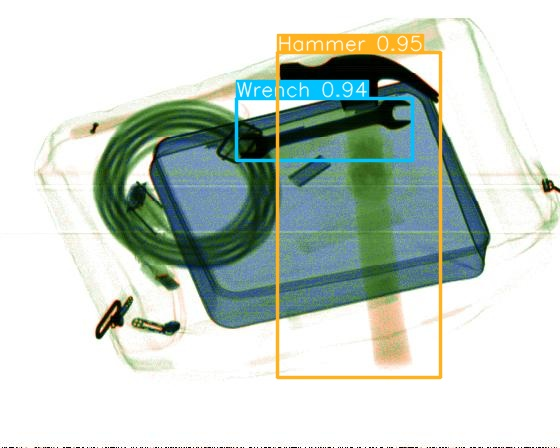

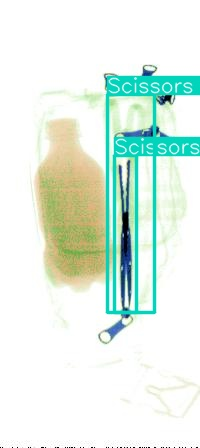

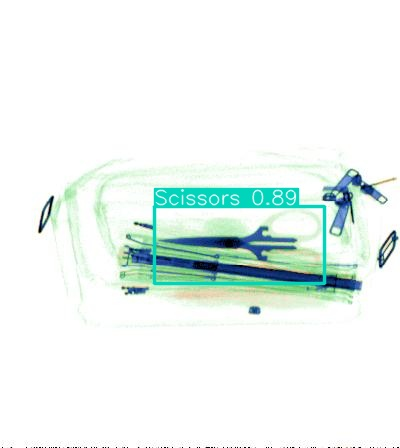

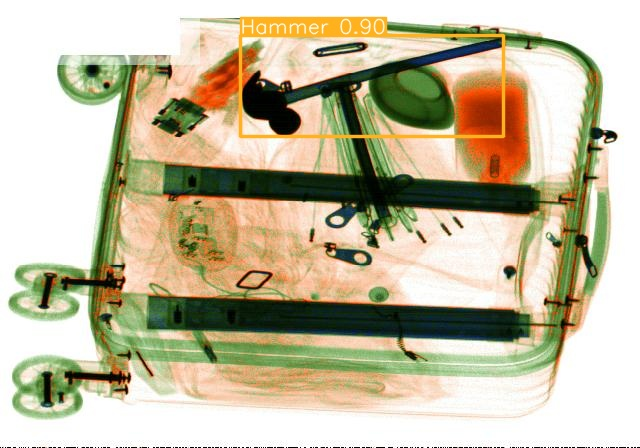

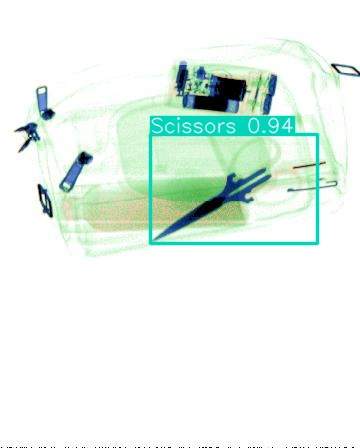

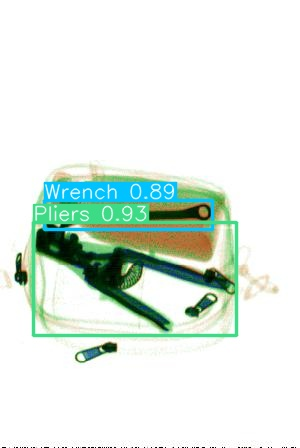

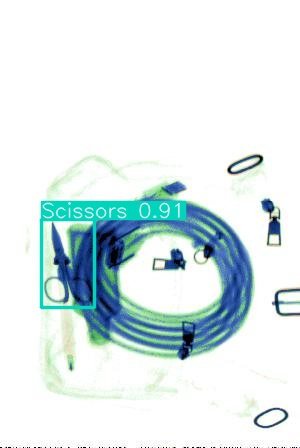

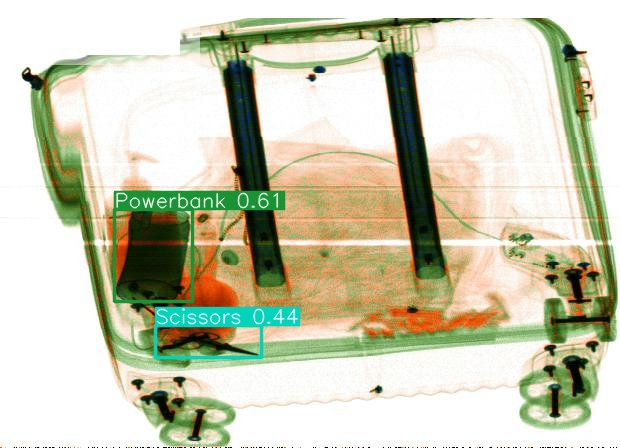

In [14]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/datasets/sixray100-1/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [15]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5362.9/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (841.01s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        5.9               0.6516                    9.42
1             TorchScript       ✅       11.9               0.6518                    4.48
2                    ONNX       ✅       11.7               0.6518                    8.63
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎       15.2                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅       29.3               0.6518                   16.07
7     TensorFlow GraphDef       ✅       11.7               0.6518                   14.73
8         TensorFlow L

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,5.9,0.6516,9.42
1,TorchScript,✅,11.9,0.6518,4.48
2,ONNX,✅,11.7,0.6518,8.63
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,❎,15.2,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,✅,29.3,0.6518,16.07
7,TensorFlow GraphDef,✅,11.7,0.6518,14.73
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN
